In [2]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import ImageFile

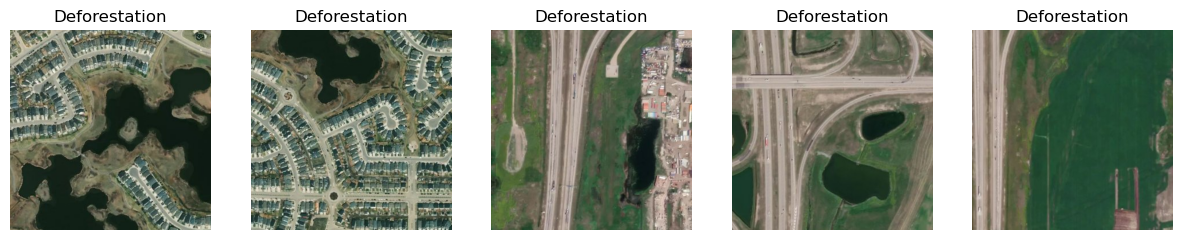

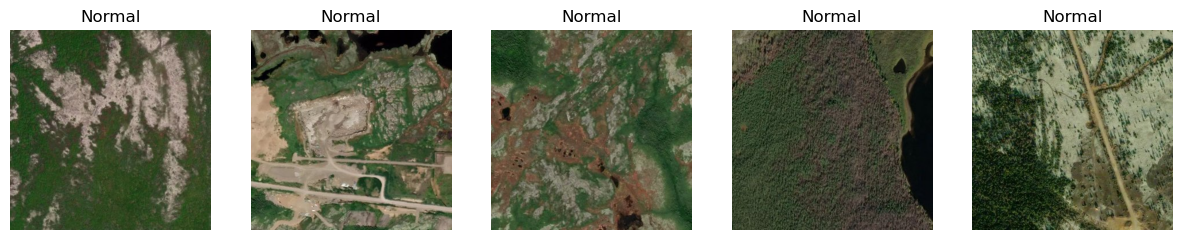

In [6]:

# Set dataset paths
DATASET_PATH = "/content/SAR/"  # Update with your actual dataset path

# Function to display images directly from a folder
def display_images_from_folder(folder, title, num_images=5):
    image_files = sorted(os.listdir(folder))[:num_images]  # Get first 'num_images' files
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i, image_file in enumerate(image_files):
        img_path = os.path.join(folder, image_file)
        img = cv2.imread(img_path)  # Read the image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

        axes[i].imshow(img)
        axes[i].set_title(title)
        axes[i].axis("off")

    plt.show()

# Display 5 images from each class
display_images_from_folder("Deforestation_Data/train/Deforestation/","Deforestation")
display_images_from_folder("Deforestation_Data/train/Normal/","Normal")


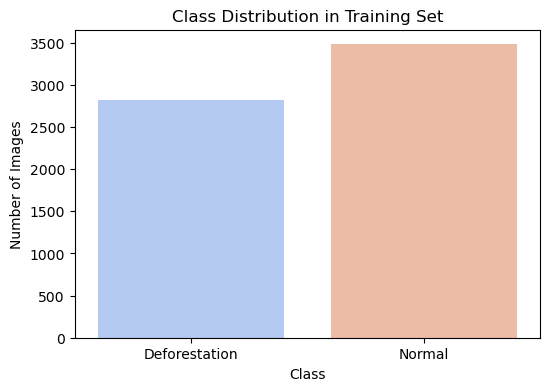

In [58]:

# Count number of images in each class
def count_images(folder):
    return len(os.listdir(folder))

# Get counts for train set
deforestation_count = count_images("Deforestation_Data/train/Deforestation/")
normal_count = count_images("Deforestation_Data/train/Normal/")

# Create a DataFrame for visualization
df = pd.DataFrame({
    "Class": ["Deforestation", "Normal"],
    "Count": [deforestation_count, normal_count]
})

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x="Class", y="Count", data=df, palette="coolwarm")
plt.title("Class Distribution in Training Set")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()


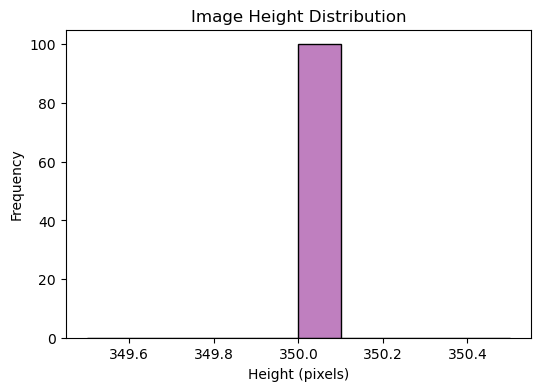

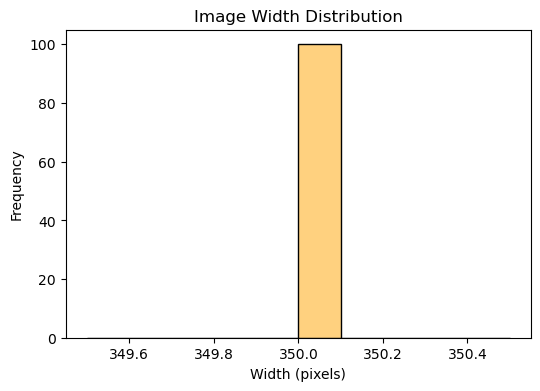

In [60]:


# Function to get image sizes
def get_image_shapes(folder, num_images=50):
    shapes = []
    image_files = os.listdir(folder)[:num_images]  # Check first 'num_images' images

    for image_file in image_files:
        img_path = os.path.join(folder, image_file)
        img = cv2.imread(img_path)
        if img is not None:
            shapes.append(img.shape)

    return shapes

# Get image dimensions from both classes
deforestation_shapes = get_image_shapes("Deforestation_Data/train/Deforestation/")
normal_shapes = get_image_shapes("Deforestation_Data/train/Normal/")

# Convert to numpy array for easy analysis
all_shapes = np.array(deforestation_shapes + normal_shapes)

# Plot histogram of image sizes
plt.figure(figsize=(6, 4))
sns.histplot(all_shapes[:, 0], bins=10, kde=True, color="purple")
plt.title("Image Height Distribution")
plt.xlabel("Height (pixels)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(all_shapes[:, 1], bins=10, kde=True, color="orange")
plt.title("Image Width Distribution")
plt.xlabel("Width (pixels)")
plt.ylabel("Frequency")
plt.show()
